# Praktikum 1: Datenanalyse

- Wichtig bei jedem Data Science Projekt
- Zuerst schaut man sich die Daten gründlich an, um daraus Erkenntnisse zu gewinnen
- Z.B. Trends und Muster, Ausreißer und interessante Zusammenhänge

Bei den Daten handelt es sich um selbst gesammelte YouTube Daten. Die Daten können [hier](https://hawhamburgedu-my.sharepoint.com/:u:/g/personal/wfy165_haw-hamburg_de/Ea59dsQRph9FpFrPuIuTB-wBOK697cJJJ43-WvWNXUhE6Q?e=hlobn0) heruntergeladen werden.

## Vorbereitungsteil

### Python Bibliotheken installieren und importieren

- Bibliotheken müssen vorher via `pip` oder `conda` installiert werden, bevor sie importiert werden können
- Wir nutzen `pandas` als Bibliothek für Datenanalyse. `pyarrow` wird von `pandas` benötigt, um Parquet-Dateien zu lesen.
- `matplotlib` und `seaborn` für Visualisierungen

In [1]:
!pip install --upgrade pip  # Sicherstellen, dass pip aktuell ist (kürzer: pip install -U pip)
!pip install pandas matplotlib seaborn pyarrow # Benötigte Bibliotheken installieren

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Daten laden

- Oft liegen Daten im CSV-Format vor. Diese können mit `pd.read_csv()` eingelesen werden.
- Die Youtube-Daten liegen jedoch im Parquet-Format vor. Daher wird die Funktion `pd.read_parquet()` benötigt, um sie zu lesen.
- Das Parquet Dateiformat ist übrigens effizienter (kleinere Dateien, schnelleres Lesen und Schreiben) als das CSV-Format.

In [5]:
# Daten mit Pandas einlesen
youtube_data = pd.read_parquet('youtube_trend_videos.parquet')
# Anzeigen der ersten 5 Zeilen des DataFrames
youtube_data.head()

,_id,created,published_at,modified_at,channel,channel_id,rank,title,tags,category,...,likes,dislikes,comments,views,duration,audio_language,text_language,caption,licensed_content,projection
0,QKWE-jtCI6A,2021-04-05T20:29:34Z,2021-04-04T11:14:13Z,2021-04-05T20:58:14Z,Dagi Bee,UCpZ_DI-ZugwMzXcqccaTVsg,[1],[Ich habe mir 4 Tattoos gestochen ( Po & Hals ...,"[[dagibee, dagi, daggi, daggy, beetique, dagi ...",26,...,"[16530.0, 16675.0]","[745.0, 777.0]","[423.0, 436.0]","[375799, 382556]",1062,de,None,False,True,rectangular
1,omZDa8BRmjs,2021-04-05T20:29:34Z,2021-04-04T17:00:28Z,2021-04-05T20:58:14Z,Gnu,UC0m40b5CPcB801gVEz25WuQ,[2],[Üble GERÜCHTE über Anni und Gnu! Jetzt reicht...,"[[Saftiges Gnu, Saftigesgnu, gnumama, gnu, gnu...",24,...,"[32424.0, 32633.0]","[502.0, 519.0]","[1553.0, 1564.0]","[297064, 302078]",889,de,None,False,True,rectangular
2,2XOFLRPnFC0,2021-04-05T20:29:34Z,2021-04-03T13:00:14Z,2021-04-06T22:37:06Z,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,"[3, 15, 3, 16, 21, 22, 27, 28, 30, 33, 34, 31,...","[Brawl Stars: Brawl Talk! Two New Brawlers, TO...","[[brawl stars, mobile game, mobile strategy ga...",20,...,"[921487.0, 922107.0, 922207.0, 922355.0, 92237...","[10917.0, 10942.0, 10947.0, 10954.0, 10955.0, ...","[114045.0, 114051.0, 114060.0, 114075.0, 11407...","[17746044, 17834813, 17852404, 17866972, 17881...",255,en,en,True,True,rectangular
3,yyNBca9vYtw,2021-04-05T20:29:34Z,2021-04-04T18:00:19Z,2021-04-05T20:58:14Z,laserluca,UCmxc6kXbU1J-0pR2F3wIx9A,"[4, 5]",[ICH WERDE ÜBERFALLEN],[None],24,...,"[52836.0, 53118.0]","[578.0, 590.0]","[9926.0, 9963.0]","[422027, 427309]",879,de,de,False,True,rectangular
4,6vrlsYoPT2U,2021-04-05T20:29:34Z,2021-04-04T11:23:07Z,2021-04-05T20:58:14Z,Fynn Kliemann,UCa_MF1hIC-oCTsEJDegmaIQ,"[5, 4]",[Sowas wie n VLOG oderso #3 | Pic & Abfahrt],[None],24,...,"[13534.0, 13596.0]",[81.0],[283.0],"[172193, 174353]",348,de,de,False,False,rectangular


Auf Basis der vorhandenen Attribute können neue Attribute generiert werden. Die neuen Attribute werden dem DataFrame hinzugefügt.

In [6]:
# Umwandlung von Datums- und Zeitangaben in den Datentyp datetime. Dies ermöglicht die Durchführung von Datums- und Zeitoperationen. Dies erzeugt keine neuen Attribute, sondern ändert nur den Datentyp der vorhandenen Attribute.
youtube_data[['created', 'published_at', 'modified_at']] = youtube_data[
    ['created', 'published_at', 'modified_at']].apply(pd.to_datetime)
# Berechnung der Zeitdifferenz zwischen 'modified_at' und 'created' in Stunden. Dies zeigt, wie lange ein Video gebraucht hat, um in die Trends zu kommen.
youtube_data['trend_time_hours'] = (youtube_data['modified_at'] - youtube_data['created']) / pd.Timedelta(hours=1)
# Extrahiert den Wochentag (als Zahl von 0 bis 6, wobei 0 für Montag steht) aus dem 'created' Datum.
youtube_data['weekday'] = youtube_data['created'].dt.weekday
# Berechnung der Zeitdifferenz zwischen 'created' und 'published_at' in Stunden.
youtube_data['hours_until_trend'] = (youtube_data['created'] - youtube_data['published_at']) / pd.Timedelta(hours=1)
# Berechnung des Wachstums der Likes eines Videos, indem die Differenz zwischen dem letzten und dem ersten Wert in der 'likes'-Liste berechnet wird.
youtube_data['likes_growth'] = youtube_data['likes'].apply(
    lambda x: x[-1] - x[0] if x[0] is not None and x[-1] is not None else None)
# Berechnung des Wachstums der Likes eines Videos pro Stunde, indem das gesamte Likes-Wachstum durch die Anzahl der Stunden, die das Video benötigt hat, um in die Trends zu kommen, geteilt wird.
youtube_data['likes_growth/hour'] = youtube_data['likes_growth'] / youtube_data['trend_time_hours']
# Extrahiert den ersten Rang eines Videos aus der 'rank'-Liste.
youtube_data['first_rank'] = youtube_data['rank'].apply(lambda x: x[0])
# Extrahiert den besten (niedrigsten) Rang eines Videos aus der 'rank'-Liste.
youtube_data['best_rank'] = youtube_data['rank'].apply(lambda x: min(x))
# Berechnet das Wachstum der Views eines Videos, indem die Differenz zwischen dem letzten und dem ersten Wert in der 'views'-Liste berechnet wird.
youtube_data['views_growth'] = youtube_data['views'].apply(
    lambda x: x[-1] - x[0] if x[0] is not None and x[-1] is not None else None)
# Berechnet das Wachstum der Views eines Videos pro Stunde, indem das gesamte Views-Wachstum durch die Anzahl der Stunden, die das Video benötigt hat, um in die Trends zu kommen, geteilt wird.
youtube_data['views_growth/hour'] = youtube_data['views_growth'] / youtube_data['trend_time_hours']

# Erstellen neuer Spalten für die aktuellsten Werte von Titel, Views, Likes, Dislikes und Kommentaren
youtube_data['title'] = youtube_data['title'].apply(lambda x: x[-1])  # Die Titel-Spalte wird überschrieben
youtube_data['views_cleaned'] = youtube_data['views'].apply(lambda x: x[-1])
youtube_data['likes_cleaned'] = youtube_data['likes'].apply(lambda x: x[-1])
youtube_data['dislikes_cleaned'] = youtube_data['dislikes'].apply(lambda x: x[-1])
youtube_data['comments_cleaned'] = youtube_data['comments'].apply(lambda x: x[-1])

In [7]:
# Spaltennamen anzeigen
youtube_data.columns

Index(['_id', 'created', 'published_at', 'modified_at', 'channel',
       'channel_id', 'rank', 'title', 'tags', 'category', 'description',
       'likes', 'dislikes', 'comments', 'views', 'duration', 'audio_language',
       'text_language', 'caption', 'licensed_content', 'projection',
       'trend_time_hours', 'weekday', 'hours_until_trend', 'likes_growth',
       'likes_growth/hour', 'first_rank', 'best_rank', 'views_growth',
       'views_growth/hour', 'views_cleaned', 'likes_cleaned',
       'dislikes_cleaned', 'comments_cleaned'],
      dtype='object')

Der DataFrame enthält jetzt folgende Attribute:

- `_id`: Eindeutiges Identifikationsmerkmal
- `created`: Datum der Erfassung durch das Skript
- `published_at`: Datum der Videoveröffentlichung
- `modified_at`: Datum der letzten Bearbeitung
- `channel`: Kanalname
- `channel_id` ID des Kanals
- `rank`: Ränge des Videos in den Trends (Liste)
- `title`: Titel des Videos
- `tags`: Tags mit denen das Video versehen wurde
- `category`: Video Kategorie (Bildung, Unterhaltung, etc.)
- `description`: Videobeschreibung
- `likes`: Anzahl der Likes (Liste)
- `dislikes`: Anzahl der Dislikes (Liste)
- `comments`: Anzahl der Kommentare (Liste)
- `views`: Anzahl der Views (Liste)
- `duration`: Länge des Videos
- `audio_language`: Sprache des Videos
- `text_language`: Sprache der Untertitel
- `caption`: Hat das Video Untertitel?
- `licensed_content`: Ist das Video lizenziert?
- `projection`: Videoformat (z.B. rechteckig)
- `trend_time_hours`: Wie viele Stunden ist das Video in den Trends?
- `weekday`: Wochentag der Veröffentlichung
- `hours_until_trend`: Wie viele Stunden braucht das Video, bevor es in die Trends kommt?
- `likes_growth`: Wachstum der Likes seitdem das Video in den Trends ist
- `likes_growth/hour`: Wachstum der Likes pro Stunde
- `first_rank`: Erstes Trend-Ranking
- `best_rank`: Bestes Trend-Ranking
- `views_growth`: Wachstum der Views seit dem das Video in den Trends ist
- `views_growth/hour`: Wachstum der Views pro Stunde
- `views_cleaned`: Aktuellste Anzahl an Views
- `likes_cleaned`: Aktuellste Anzahl an Likes
- `dislikes_cleaned`: Aktuellste Anzahl an Dislikes
- `comments_cleaned`: Aktuellste Anzahl an Kommentaren

In [8]:
# Erste 5 Zeilen des DataFrames anzeigen
youtube_data.head()

,_id,created,published_at,modified_at,channel,channel_id,rank,title,tags,category,...,likes_growth,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned
0,QKWE-jtCI6A,2021-04-05 20:29:34+00:00,2021-04-04 11:14:13+00:00,2021-04-05 20:58:14+00:00,Dagi Bee,UCpZ_DI-ZugwMzXcqccaTVsg,[1],Ich habe mir 4 Tattoos gestochen ( Po & Hals 😳...,"[[dagibee, dagi, daggi, daggy, beetique, dagi ...",26,...,145.0,303.488372,1,1,6757,14142.558140,382556,16675.0,777.0,436.0
1,omZDa8BRmjs,2021-04-05 20:29:34+00:00,2021-04-04 17:00:28+00:00,2021-04-05 20:58:14+00:00,Gnu,UC0m40b5CPcB801gVEz25WuQ,[2],Üble GERÜCHTE über Anni und Gnu! Jetzt reichts...,"[[Saftiges Gnu, Saftigesgnu, gnumama, gnu, gnu...",24,...,209.0,437.441860,2,2,5014,10494.418605,302078,32633.0,519.0,1564.0
2,2XOFLRPnFC0,2021-04-05 20:29:34+00:00,2021-04-03 13:00:14+00:00,2021-04-06 22:37:06+00:00,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,"[3, 15, 3, 16, 21, 22, 27, 28, 30, 33, 34, 31,...","Brawl Stars: Brawl Talk! Two New Brawlers, TON...","[[brawl stars, mobile game, mobile strategy ga...",20,...,18543.0,709.764811,3,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0
3,yyNBca9vYtw,2021-04-05 20:29:34+00:00,2021-04-04 18:00:19+00:00,2021-04-05 20:58:14+00:00,laserluca,UCmxc6kXbU1J-0pR2F3wIx9A,"[4, 5]",ICH WERDE ÜBERFALLEN,[None],24,...,282.0,590.232558,4,4,5282,11055.348837,427309,53118.0,590.0,9963.0
4,6vrlsYoPT2U,2021-04-05 20:29:34+00:00,2021-04-04 11:23:07+00:00,2021-04-05 20:58:14+00:00,Fynn Kliemann,UCa_MF1hIC-oCTsEJDegmaIQ,"[5, 4]",Sowas wie n VLOG oderso #3 | Pic & Abfahrt,[None],24,...,62.0,129.767442,5,4,2160,4520.930233,174353,13596.0,81.0,283.0


### Explorative Datenanalyse

Zu Beginn einer Datenanalyse müssen die Daten mit statistischen Methoden auf Qualität untersucht werden.

#### Übersicht über die Werte

Mit der Funktion `info()` kann sich ein Überblick über die Daten verschafft werden. Dazu gehört:

- Anzahl der Einträge
- Anzahl der Spalten
- Spaltennamen
- Anzahl der nicht-null Werte pro Spalte
- Datentypen der Spalten
- Speicherbedarf (RAM)

In [9]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17951 entries, 0 to 17950
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   _id                17951 non-null  object             
 1   created            17951 non-null  datetime64[ns, UTC]
 2   published_at       17951 non-null  datetime64[ns, UTC]
 3   modified_at        17951 non-null  datetime64[ns, UTC]
 4   channel            17951 non-null  object             
 5   channel_id         17951 non-null  object             
 6   rank               17951 non-null  object             
 7   title              17951 non-null  object             
 8   tags               17951 non-null  object             
 9   category           17951 non-null  int64              
 10  description        17951 non-null  object             
 11  likes              17951 non-null  object             
 12  dislikes           17951 non-null  object     

#### Fehlende Werte

Mit der Funktion `isnull()` kann die Anzahl an fehlenden Werten pro Spalte ermittelt werden. Fehlende Werte können die Analyse beeinflussen und müssen daher behandelt werden.


In [10]:
missing_values = youtube_data.isnull().sum()
missing_values

_id                      0
created                  0
published_at             0
modified_at              0
channel                  0
channel_id               0
rank                     0
title                    0
tags                     0
category                 0
description              0
likes                    0
dislikes                 0
comments                 0
views                    0
duration                 0
audio_language        5488
text_language        13208
caption                  0
licensed_content         0
projection               0
trend_time_hours         0
weekday                  0
hours_until_trend        0
likes_growth            51
likes_growth/hour       51
first_rank               0
best_rank                0
views_growth             0
views_growth/hour        0
views_cleaned            0
likes_cleaned           51
dislikes_cleaned      8895
comments_cleaned       251
dtype: int64

Fehlende Werte können auf verschiedene Weisen behandelt werden: Z.B. durch Entfernen, Ersetzen (z.B. durch Mean oder Median) oder Interpolation. Es kommt darauf, wie die Daten weiterverwendet werden sollen und ob die Spalten interessant für die Analyse sind. Beim Ersetzen von fehlenden Werten kann es zu Verzerrungen kommen.

Side Note: Wieso gibt es 51 fehlende Werte bei `likes_growth`?

Wenn man sich diese Einträge anschaut, stellt man fest, dass das Attribut `likes` in diesen Einträgen eine Liste mit null enthält. Dadurch kann die Berechnung nicht durchgeführt werden.

In [11]:
youtube_data[youtube_data['likes_growth'].isnull()]

,_id,created,published_at,modified_at,channel,channel_id,rank,title,tags,category,...,likes_growth,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned
503,0VgbMG503Ws,2021-04-19 16:49:04+00:00,2021-04-18 21:00:16+00:00,2021-04-19 23:00:04+00:00,Marc Anthony,UCiKsRIULyLr783nNZm-JlAQ,"[2, 3]",Marc Anthony - Una Noche (Full Concert),"[[marc anthony new album, marc anthony new son...",10,...,NaN,NaN,2,2,785560,127044.743935,4587209,NaN,NaN,19457.0
735,PUtk3ryShOo,2021-04-29 00:49:05+00:00,2021-04-28 15:38:59+00:00,2021-04-29 22:33:06+00:00,Samsung,UCWwgaK7x0_FR1goeSRazfsQ,"[24, 26, 28, 32, 33, 32, 31, 32, 31, 30, 29, 2...",Galaxy Unpacked April 2021: Official Replay | ...,"[[Samsungevent, Galaxy Unpacked, Unpacked, Sam...",28,...,NaN,NaN,24,24,6268993,288446.911466,7743260,NaN,NaN,NaN
1250,zTTtd6bnhFs,2021-05-15 18:48:06+00:00,2021-05-15 01:07:14+00:00,2021-05-17 16:23:06+00:00,FINAL FANTASY XIV,UCpx2BZg8ABgaDV50sGJtWAg,"[15, 17, 18, 17, 18, 17, 16, 17, 16, 17, 16, 1...",FINAL FANTASY XIV: ENDWALKER Full Trailer,"[[FF14, FFXIV, Final Fantasy XIV (Video Game),...",20,...,NaN,NaN,15,15,342016,7503.093236,540999,NaN,NaN,NaN
1251,pfqi_ow02rE,2021-05-15 18:48:06+00:00,2021-05-15 01:17:55+00:00,2021-05-17 06:44:06+00:00,FINAL FANTASY XIV,UCpx2BZg8ABgaDV50sGJtWAg,"[19, 22, 23, 22, 21, 20, 21, 22, 23, 25, 24, 2...",FINAL FANTASY XIV: ENDWALKER Reaper Reveal,"[[FF14, FFXIV, Final Fantasy XIV (Video Game),...",20,...,NaN,NaN,19,19,216714,6031.001855,497703,NaN,NaN,NaN
1868,_WhEoEKKqqk,2021-06-02 23:57:04+00:00,2021-06-01 20:30:01+00:00,2021-06-03 23:02:06+00:00,Noah Schnacky,UC53vQ5UaxOOxdp8wZ48PoUw,"[35, 33, 37, 35, 40, 38, 40, 37, 38, 35, 37, 3...",I can’t believe this happened 😂 #shorts,[None],10,...,NaN,NaN,35,33,223490,9681.644244,379130,NaN,NaN,526.0
1941,1DtOCrEly-8,2021-06-05 00:12:04+00:00,2021-06-04 05:08:11+00:00,2021-06-06 19:57:06+00:00,CONMEBOL,UCzU8-lZlRfkV3nj0RzAZdrQ,"[14, 16, 15, 18, 17, 18, 16, 19, 18, 30, 33, 3...",Eliminatorias Sudamericanas | Perú vs Colombia...,"[[fútbol, pelota, gol, copa, libertadores, sud...",17,...,NaN,NaN,14,14,590016,13485.908750,1487519,NaN,NaN,6011.0
1963,aGpMoCf6mKQ,2021-06-05 19:59:05+00:00,2021-06-05 04:06:45+00:00,2021-06-07 06:29:06+00:00,CONMEBOL,UCzU8-lZlRfkV3nj0RzAZdrQ,"[26, 29, 28, 26, 25, 30, 28, 29, 28, 29, 28, 2...",Eliminatorias Sudamericanas | Brasil vs Ecuado...,"[[fútbol, pelota, gol, copa, libertadores, sud...",17,...,NaN,NaN,26,25,497861,14430.637434,979614,NaN,NaN,4167.0
2022,J-PEgE08fuY,2021-06-07 22:06:05+00:00,2021-06-07 10:52:23+00:00,2021-06-08 23:07:06+00:00,June's Journey,UCRKICpP67SJhybGg2nrn9_w,"[19, 20, 23, 22, 27, 32, 33, 32, 31, 30, 31, 3...",How to Serve Drinks in the June's Journey Dete...,[None],20,...,NaN,NaN,19,19,122597,4900.558510,340495,NaN,NaN,1477.0
2218,iHCjPjVGqbM,2021-06-13 10:03:05+00:00,2021-06-04 14:00:14+00:00,2021-06-14 17:33:06+00:00,YELLOWIKI,UCopTC8JvbiccbtBDyMsVQPw,"[14, 17, 18, 30, 42, 43, 44, 43, 44, 42]",OMG What's happening? #shorts​ Cool videos fro...,"[[YELLOWIKI, yelowiki, shorts, short, tiktok, ...",22,...,NaN,NaN,14,14,11745946,372883.886385,26970261,NaN,NaN,1481.0
3174,l_IZbsnstZY,2021-07-09 22:49:04+00:00,2021-07-09 15:59:37+00:00,2021-07-12 23:24:06+00:00,Kylie Jenner,UCWkYXtnAuu7VTLPwUcRSB6A,"[10, 9, 8, 9, 8, 7, 6, 5, 6, 7, 6, 10, 11, 12,...",INSIDE KYLIE COSMETICS PART ONE: THE BEGINNING,"[[Kylie Jenner, Kylie Cosmetics, Kris Jenner, ...",22,...,NaN,NaN,10,5,2542210,35024.439155,3004900,NaN,NaN,8322.0


#### Videosprache

Welche Sprache haben die Videos?

In [12]:
youtube_data['text_language'].fillna('').apply(lambda x: x[0:2]).value_counts(ascending=False)

text_language
      13208
en     2548
de     1971
ko      116
es       44
tr       15
ro       12
ja       10
ar        6
sq        4
sr        3
it        2
fr        2
ru        2
zh        2
aa        1
pt        1
vi        1
pl        1
bs        1
nl        1
Name: count, dtype: int64

Einige Spalten können nun gelöscht werden, da diese nicht mehr benötigt werden.

In [13]:
youtube_data = youtube_data.drop(
    ['_id', 'created', 'modified_at', 'channel_id', 'rank', 'tags', 'description', 'likes', 'dislikes', 'comments',
     'views', 'text_language', 'audio_language'], axis=1)

Einträge, die fehlende Werte enthalten, werden entfernt.

In [14]:
youtube_data = youtube_data.dropna()
youtube_data

,published_at,channel,title,category,duration,caption,licensed_content,projection,trend_time_hours,weekday,...,likes_growth,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned
0,2021-04-04 11:14:13+00:00,Dagi Bee,Ich habe mir 4 Tattoos gestochen ( Po & Hals 😳...,26,1062,False,True,rectangular,0.477778,0,...,145.0,303.488372,1,1,6757,14142.558140,382556,16675.0,777.0,436.0
1,2021-04-04 17:00:28+00:00,Gnu,Üble GERÜCHTE über Anni und Gnu! Jetzt reichts...,24,889,False,True,rectangular,0.477778,0,...,209.0,437.441860,2,2,5014,10494.418605,302078,32633.0,519.0,1564.0
2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",20,255,True,True,rectangular,26.125556,0,...,18543.0,709.764811,3,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0
3,2021-04-04 18:00:19+00:00,laserluca,ICH WERDE ÜBERFALLEN,24,879,False,True,rectangular,0.477778,0,...,282.0,590.232558,4,4,5282,11055.348837,427309,53118.0,590.0,9963.0
4,2021-04-04 11:23:07+00:00,Fynn Kliemann,Sowas wie n VLOG oderso #3 | Pic & Abfahrt,24,348,False,False,rectangular,0.477778,0,...,62.0,129.767442,5,4,2160,4520.930233,174353,13596.0,81.0,283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9096,2021-12-11 15:00:23+00:00,RedSama,DOUBLE PUMP IST ZURÜCK und es ist BESSER ALS N...,20,554,False,True,rectangular,15.416389,0,...,412.0,26.724806,32,22,8132,527.490585,91339,7543.0,124.0,277.0
9097,2021-12-11 18:43:30+00:00,Sky Sport Austria,Adeyemi mit Hattrick! | RB Salzburg - WSG Tiro...,17,440,False,True,rectangular,12.233056,0,...,68.0,5.558709,33,30,7128,582.683531,124861,2596.0,33.0,96.0
9099,2021-12-12 08:00:10+00:00,Subi Performance,WOW ! Diese Technik rettet Motoren binnen Seku...,2,2095,False,True,rectangular,15.416389,0,...,376.0,24.389629,36,30,17156,1112.841673,97502,4079.0,51.0,355.0
9116,2021-12-12 09:11:26+00:00,Tim Budesheim,Etwas privates... ⛔️,17,279,False,False,rectangular,8.083333,0,...,201.0,24.865979,40,40,3645,450.927835,47080,4951.0,45.0,480.0


#### Beliebteste Videokategorien

Welche Videokategorien sind am häufigsten in den Trends?

Die Videokategorien liegen aktuell nur als IDs vor. Die IDs werden auf die tatsächlichen Namen der Kategorien gemappt. Dies erleichtert es, die Daten zu analysieren und die Ergebnisse zu interpretieren. Anschließend wird untersucht, welche Kategorien von Videos am häufigsten in den Trends sind.

In [15]:
# Kategorien-Dictionary erstellen
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}

# Mapping der Kategorien
youtube_data['category_name'] = youtube_data['category'].map(category_mapping)

Jetzt kann auch die 'category'-Spalte gelöscht werden.

In [16]:
youtube_data = youtube_data.drop(['category'], axis=1)
youtube_data.head()

,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,hours_until_trend,...,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name
0,2021-04-04 11:14:13+00:00,Dagi Bee,Ich habe mir 4 Tattoos gestochen ( Po & Hals 😳...,1062,False,True,rectangular,0.477778,0,33.255833,...,303.488372,1,1,6757,14142.558140,382556,16675.0,777.0,436.0,Howto & Style
1,2021-04-04 17:00:28+00:00,Gnu,Üble GERÜCHTE über Anni und Gnu! Jetzt reichts...,889,False,True,rectangular,0.477778,0,27.485000,...,437.441860,2,2,5014,10494.418605,302078,32633.0,519.0,1564.0,Entertainment
2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,55.488889,...,709.764811,3,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming
3,2021-04-04 18:00:19+00:00,laserluca,ICH WERDE ÜBERFALLEN,879,False,True,rectangular,0.477778,0,26.487500,...,590.232558,4,4,5282,11055.348837,427309,53118.0,590.0,9963.0,Entertainment
4,2021-04-04 11:23:07+00:00,Fynn Kliemann,Sowas wie n VLOG oderso #3 | Pic & Abfahrt,348,False,False,rectangular,0.477778,0,33.107500,...,129.767442,5,4,2160,4520.930233,174353,13596.0,81.0,283.0,Entertainment


## Aufgabenteil

### Wie viele Videos gibt es pro Kategorie?

<span style="color:red">Schreibt den Python Code dafür in die nächste Zelle.</span>

Hinweis: Das gewünschte Ergebnis ist bereits in der Zeile darunter geplottet. Eures sollte so ähnlich aussehen.

In [21]:
# TODO: Hier soll euer Code stehen.

category_name
Entertainment            1930
Gaming                   1833
Music                    1369
Sports                    998
People & Blogs            889
Comedy                    453
Film & Animation          283
News & Politics           277
Science & Technology      235
Howto & Style             211
Education                 194
Autos & Vehicles          188
Travel & Events            45
Pets & Animals             36
Nonprofits & Activism      13
Name: count, dtype: int64

In [17]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

category_name
Entertainment            1930
Gaming                   1833
Music                    1369
Sports                    998
People & Blogs            889
Comedy                    453
Film & Animation          283
News & Politics           277
Science & Technology      235
Howto & Style             211
Education                 194
Autos & Vehicles          188
Travel & Events            45
Pets & Animals             36
Nonprofits & Activism      13
Name: count, dtype: int64

Erstellt daraus ein Balkendiagramm, um es zu visualisieren.

- Färbt alle Balken zunächst grau ein
- Färbt den Balken für Gaming grün ein
- Nutzt die Bibliothek `matplotlib`

<span style="color:red">Schreibt den Python Code dafür in die nächste Zelle.</span>

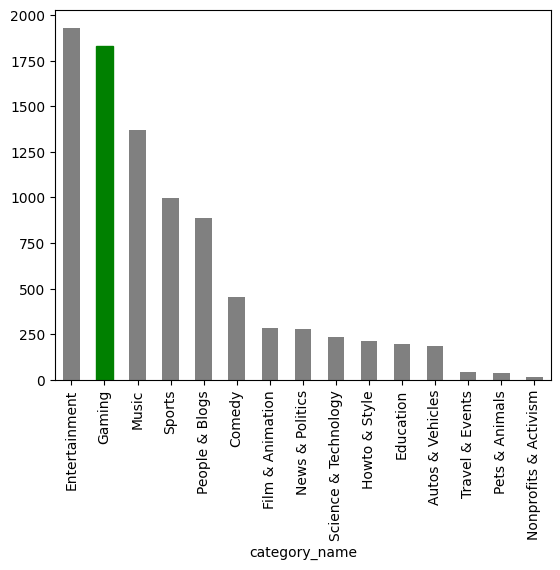

In [26]:
# TODO: Hier soll euer Code stehen.

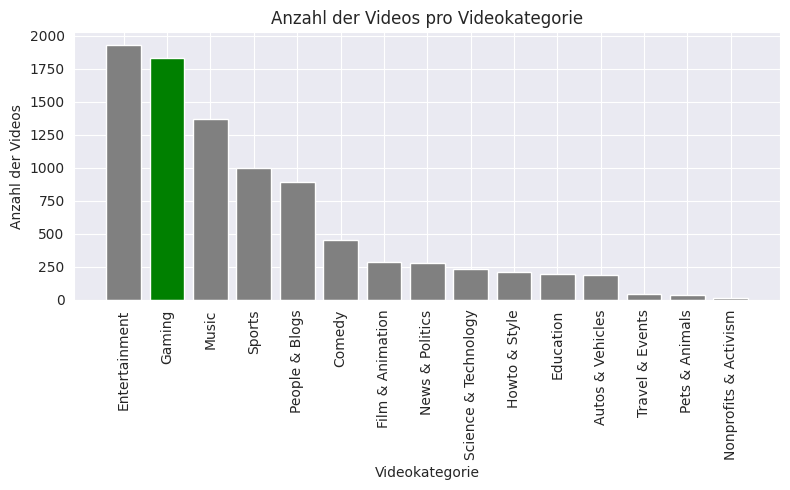

In [20]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

### Was macht ein gutes Gaming-Video aus?

Es werden nur die Gamingdaten benötigt.

- Extrahiere die Daten anhand der **Kategorie** Gaming, um darauf arbeiten zu können.
- Hinweis: Pandas mag es nicht, wenn man direkt auf einem Slice arbeitet, erstellt daher eine Kopie von dem Slice (`copy()`), damit keine Fehler entstehen.

<span style="color:red">Schreibt den Python Code dafür in die nächste Zelle.</span>

In [30]:
# TODO: Hier soll euer Code stehen.

,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,hours_until_trend,...,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name
2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,55.488889,...,709.764811,3,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming
7,2021-04-04 21:57:24+00:00,Technoblade,"I Must Win MrBeast's $10,000 Refrigerator",788,False,True,rectangular,76.758889,0,22.536111,...,2151.281791,8,1,4036487,52586.574121,6988056,594257.0,3372.0,30740.0,Gaming
9,2021-04-03 18:58:05+00:00,ELoTRiX - Clips,ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN -...,238,False,True,rectangular,0.477778,0,49.524722,...,175.813953,10,10,1724,3608.372093,220157,16823.0,159.0,494.0,Gaming
19,2021-04-04 19:00:00+00:00,Grian,Hermitcraft 7: Episode 73 - C.E.O of BARGE Co.,1374,False,True,rectangular,50.442222,0,25.492778,...,371.930482,20,3,678741,13455.810829,1983417,119843.0,807.0,21864.0,Gaming
24,2021-04-04 18:14:54+00:00,MrBeast Gaming,Hide And Seek Across The Earth!,589,False,True,rectangular,69.658889,0,26.244444,...,2161.360917,25,6,6372900,91487.247380,14851126,697718.0,9338.0,50360.0,Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,2021-12-11 00:30:00+00:00,Doni Bobes,I Put my Friend in a World where NOTHING is Re...,2073,False,True,rectangular,7.916667,5,19.968056,...,464.589474,49,45,131506,16611.284211,791517,36442.0,1134.0,4603.0,Gaming
9090,2021-12-11 16:00:33+00:00,Let's Game It Out,This Theme Park is 100% Pure Havoc - Planet Co...,859,False,True,rectangular,17.816389,0,32.459167,...,442.570043,26,20,179217,10059.109122,1384507,92165.0,904.0,4852.0,Gaming
9094,2021-12-11 15:00:21+00:00,DYMA,Letztes Mal Babysitten mit DYMA 💛| IG: @itsdyma,27,False,True,rectangular,15.416389,0,33.462500,...,44.368367,30,29,5458,354.038812,168073,13229.0,148.0,60.0,Gaming
9096,2021-12-11 15:00:23+00:00,RedSama,DOUBLE PUMP IST ZURÜCK und es ist BESSER ALS N...,554,False,True,rectangular,15.416389,0,33.461944,...,26.724806,32,22,8132,527.490585,91339,7543.0,124.0,277.0,Gaming


Jetzt können diverse Plots erstellt werden, um zu analysieren, was die beliebtesten Gamingvideos ausmacht. Um das herauszufinden, muss zunächst definiert werden, was "beliebt" bedeutet. Z.B. die Anzahl der Views, Likes, Kommentare oder eine Kombination davon.

**Kriterien:**

Die Daten werden basierend auf den folgenden Kriterien analysiert:

1. Popularität
    - Verteilung der Anzahl der Views und Likes
    - Top-Videos basierend auf Views und Likes
2. Performance von Kanälen
    - Welche Kanäle haben im Durchschnitt die meisten Views und Likes
3. Verteilung der Videolänge
   - Verteilung der Videolängen für die beliebtesten Videos
4. Schnelligkeit des Trends
    - Verteilung der Stunden bis zum Trend
    - Top-Videos, die am schnellsten in die Trends gekommen sind
5. Wochentag der Veröffentlichung
    - Analyse des Wochentags der Veröffentlichung

#### Popularität

- Plottet die Verteilung der Views und Likes
- Nutzt dafür ein Histogramm mit 15 Bins
- Nutzt die Bibliothek `seaborn`

<span style="color:red">Schreibt den Python Code dafür in die nächste Zelle.</span>

<Axes: xlabel='views_cleaned', ylabel='Count'>

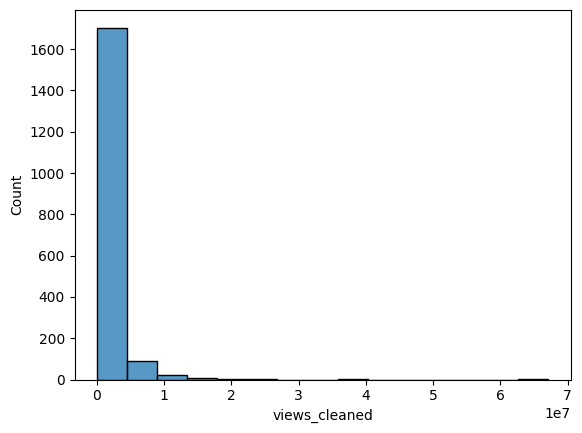

In [33]:
# TODO: Hier soll euer Code stehen.

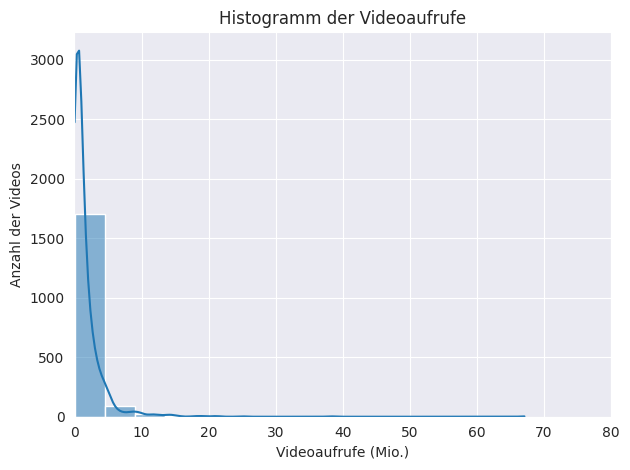

In [26]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

<Axes: xlabel='likes_cleaned', ylabel='Count'>

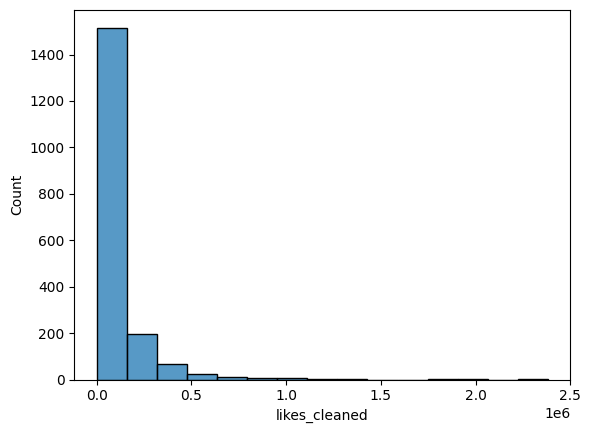

In [34]:
# TODO: Hier soll euer Code stehen.

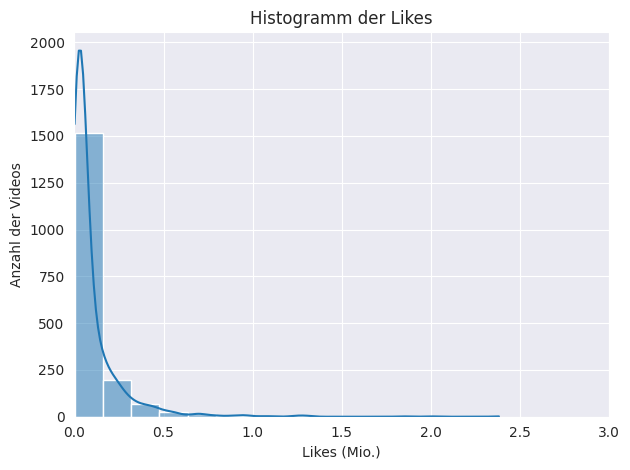

In [28]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

<span style="color:red">Schreibt eine kurze Analyse und Interpretation der Plots.</span>

TODO: Hier soll eure Analyse stehen.

Verteilung der Videoaufrufe:

- Der Großteil der Videos hat zwischen 0 und 1 Million Aufrufe.
- Ein kleinerer Anteil der Videos hat zwischen 1 Million und 10 Millionen Aufrufe.
- Es gibt nur sehr wenige Videos, die mehr Aufrufe erreichen, was darauf hindeutet, dass solch eine hohe Anzahl an Aufrufen eher die Ausnahme als die Regel ist.

Verteilung der Likes:

- Die meisten Videos haben zwischen 0 und 250.000 Likes.
- Ein kleinerer Anteil der Videos hat zwischen 250.000 und 500.000 Likes.
- Videos mit mehr als 500.000 Likes sind relativ selten, und nur wenige Videos erreichen über 2 Millionen Likes.

Interpretation:

- Die Verteilungen für Aufrufe und Likes sind recht ähnlich, was darauf hindeutet, dass Videos mit einer höheren Anzahl an Aufrufen tendenziell auch eine höhere Anzahl an Likes haben.
- Beide Histogramme zeigen, dass die Mehrheit der Videos eine moderate Anzahl von Aufrufen und Likes hat, während nur wenige Videos extrem populär sind und eine sehr hohe Anzahl von Aufrufen und Likes erzielen.
- Das Vorhandensein von Videos mit einer extrem hohen Anzahl von Aufrufen oder Likes deutet darauf hin, dass es einige "Viral Hits" gibt, die weit über den Durchschnitt hinaus beliebt sind.

#### Performance von Kanälen

Als Nächstes sollt ihr die Performance verschiedener Kanäle analysieren und herausfinden, welche Kanäle im Durchschnitt die meisten Aufrufe und Likes haben.

- Nutzt dafür die Bibliothek `seaborn`
- Tipp: Nutzt die Funktionen `groupby()` und `agg()` um Daten zu filtern
- Berechnet die durchschnittlichen Views und Likes pro Kanal
- Plottet die top 10 Kanäle nach durchschnittlichen Views mit einem Balkendiagramm (barplot)
- Plottet die entsprechenden durchschnittlichen Likes mit einem Liniendiagramm in dem Balkendiagramm (lineplot)

<span style="color:red">Schreibt den Python Code dafür in die nächste Zelle.</span>

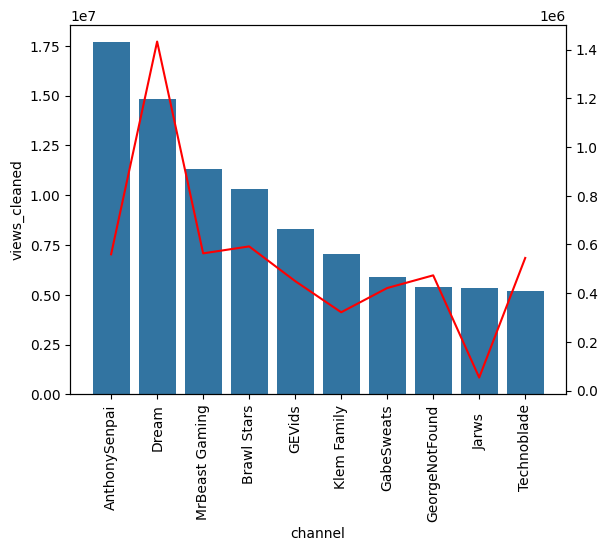

In [53]:
# TODO: Hier soll euer Code stehen.

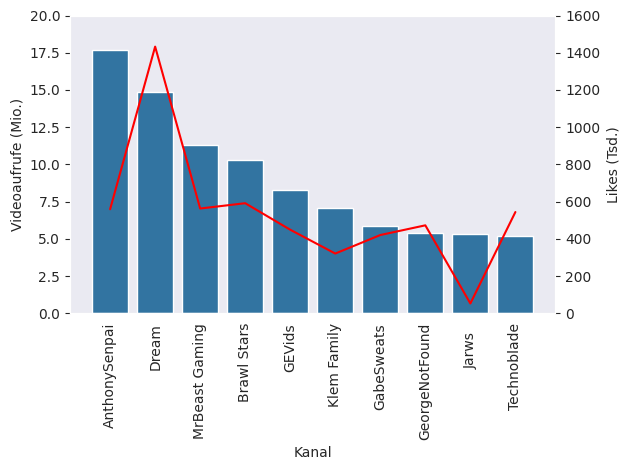

In [32]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

<span style="color:red">Schreibt eine kurze Analyse und Interpretation der Plots.</span>

TODO: Hier soll eure Analyse und Interpretation stehen.

- Anthony Senpai hat mit durchschnittlich 17 Mio. Views die meisten Aufrufe bei seinen Videos, aber nur ca. 7,5 Mio. Likes im Durchschnitt.
- Dream ist an zweiter Stelle, hat im Durchschnitt aber mehr Likes als Anthony Senpai.
- Jarws hat viele Views aber im Verhältnis sehr wenig Likes.
- Es ist also nicht immer so, dass viele Views auch viele Likes hervorrufen.

#### Verteilung der Videolänge

Nun sollt ihr die Daten in Bezug auf die Videolänge analysieren und sie in einem Histogramm darstellen, um die Verteilung der Videolängen für die beliebtesten Videos (basierend auf Aufrufen und Likes) zu zeigen.

Geht wie folgt vor:

- Teilt die Videos basierend auf ihrer Dauer (z.B. 0-5 Minuten, 5-10 Minuten, usw.) in verschiedene Kategorien (Bins) ein.
- Um die Bins zu erzeugen, könnt ihr die Pandas-Funktion `cut()` verwenden.
- Berechnet den Durchschnitt der Aufrufe und Likes für jede Kategorie.
- Stellt die Durchschnittswerte in einem Balkendiagramm dar, um zu zeigen, welche Videolängen-Kategorie im Durchschnitt die meisten Aufrufe und Likes erhält.
- Nutzt die Bibliothek `seaborn`
- Die Funktionen `groupby()`und `agg()` helfen euch

<span style="color:red">Schreibt den Python Code dafür in die nächste Zelle.</span>

In [33]:
# TODO: Hier soll euer Code stehen.

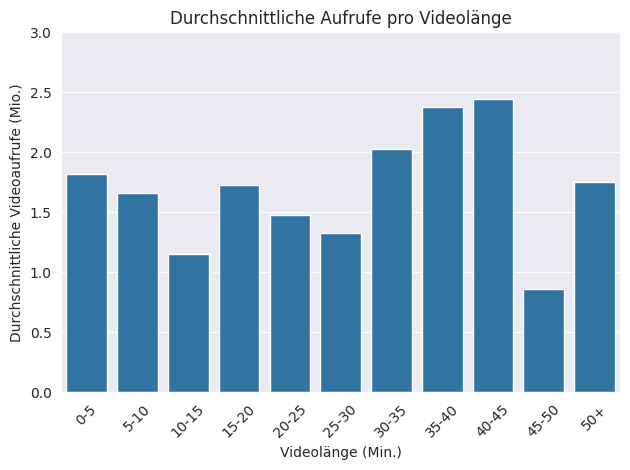

In [37]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

In [ ]:
# TODO: Hier soll euer Code stehen.

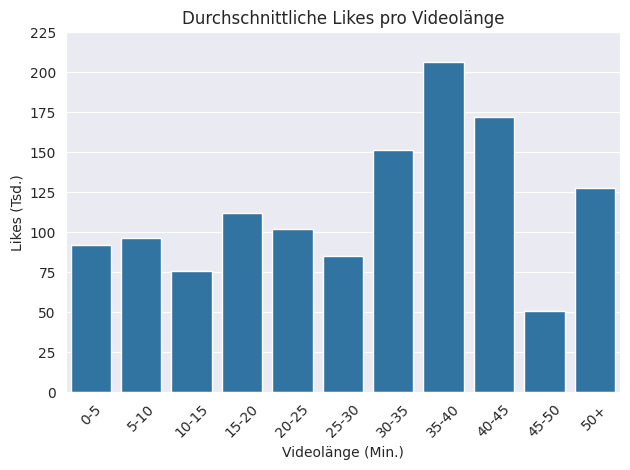

In [38]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

<span style="color:red">Schreibt eine kurze Analyse und Interpretation der Plots.</span>

TODO: Hier soll eure Analyse und Interpretation stehen.

Durchschnittliche Aufrufe nach Videodauer:

- Videos, die zwischen 35-40 und 40-45 Minuten lang sind, haben im Durchschnitt die höchste Anzahl von Aufrufen.
- Es gibt interessanterweise einen Rückgang bei Videos, die zwischen 45-50 Minuten lang sind.
- Überraschenderweise haben Videos, die länger als 50 Minuten sind, auch eine relativ hohe durchschnittliche Anzahl von Aufrufen, obwohl sie nicht so beliebt sind wie Videos, die 40-45 Minuten lang sind.

Durchschnittliche Likes nach Videodauer:

- Ähnlich wie bei den Aufrufen haben Videos, die zwischen 35-40 und 40-45 Minuten lang sind, im Durchschnitt die höchste Anzahl von Likes.
- Es gibt auch hier einen Rückgang bei Videos, die zwischen 45-50 Minuten lang sind.
- Und wiederum haben Videos, die länger als 50 Minuten sind, eine relativ hohe durchschnittliche Anzahl von Likes.

Interpretation:

- Es scheint, dass Videos mit einer Dauer von 35-45 Minuten am beliebtesten sind, gemessen an der durchschnittlichen Anzahl von Aufrufen und Likes.
- Während längere Videos (über 50 Minuten) nicht unbedingt die höchste Anzahl von Aufrufen und Likes haben, erhalten sie immer noch eine beachtliche Menge an Engagement, was darauf hindeutet, dass es ein Publikum für solche langen Videos gibt.

#### Schnelligkeit des Trends

Welche Videos sind am schnellsten in die Trends gekommen?

- Erstellt ein Histogramm für die Stunden bis zum Trend (`hours_until_trend`) und 15 Bins
- Verwendet `seaborn`

<span style="color:red">Schreibt den Python Code dafür in die nächste Zelle.</span>

In [39]:
# TODO: Hier soll euer Code stehen.

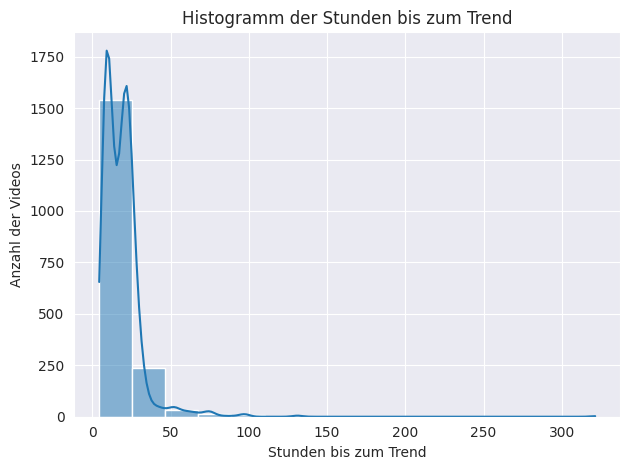

In [41]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

Erstellt eine Tabelle (einen DataFrame) mit den fünf Videos, die am schnellsten in die Trends gekommen sind.

<span style="color:red">Schreibt den Python Code dafür in die nächste Zelle.</span>

In [42]:
# TODO: Hier soll euer Code stehen.

In [44]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

,title,channel,hours_until_trend
2097,Battlefield 2042 Official Reveal Trailer (ft. ...,Battlefield,4.330278
4968,where I've been,Technoblade,4.734444
3683,"Minecraft, But Item Drops Are Random And Multi...",Sapnap,4.909444
5955,"""Final Waltz"" | Dream SMP Animation",SAD-ist,5.065000
5574,The Visitor [Dream SMP],Technoblade,5.316111


<span style="color:red">Schreibt eine kurze Interpretation der Tabelle.</span>

TODO: Hier soll eure Interpretation stehen.

Interpretation

- Diese Videos haben es geschafft, in weniger als fünfeinhalb Stunden nach ihrer Veröffentlichung in die Trends zu kommen, was beeindruckend ist.
- Am beliebtesten war der Trailer zu Battlefield 2042.

#### Wochentag der Veröffentlichung

Analysiert den Wochentag der Veröffentlichung, um zu schauen, ob es bestimmte Tage gibt, an denen Videos tendenziell beliebter sind.

Geht wie folgt vor:
- Extrahiert den Wochentag aus dem Veröffentlichungsdatum und speichert ihn in einer neuen Spalte.
- Berechnet die durchschnittliche Anzahl von Aufrufen und Likes für jeden Wochentag.
- Stellt die erhaltenen Durchschnittswerte jeweils in einem `seaborn` Balkendiagramm dar, um zu zeigen, welche Wochentage im Durchschnitt die meisten Aufrufe und Likes erhalten.

<span style="color:red">Schreibt den Python Code dafür in die nächste Zelle.</span>

In [45]:
# TODO: Hier soll euer Code stehen.

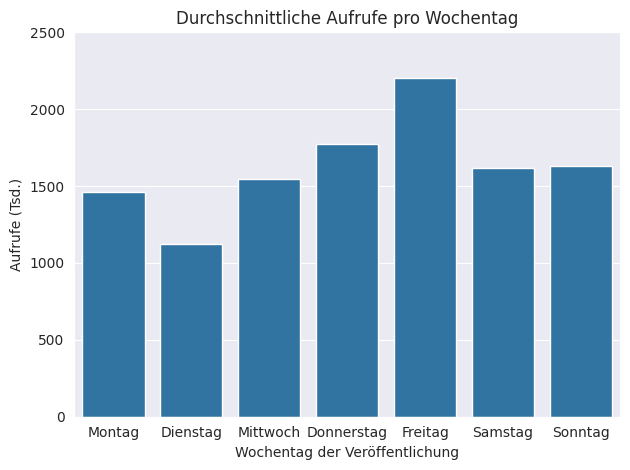

In [48]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

In [ ]:
# TODO: Hier soll euer Code stehen.

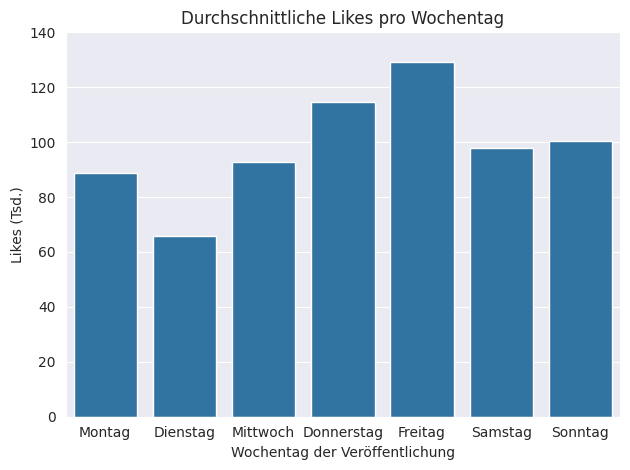

In [49]:
# Diese Zelle nicht ausführen, sonst verschwindet der Output!

<span style="color:red">Schreibt eine kurze Analyse und Interpretation der Plots.</span>

TODO: Hier soll eure Analyse und Interpretation stehen.

Durchschnittliche Aufrufe nach Wochentag:

- Freitag hat im Durchschnitt die höchste Anzahl von Aufrufen, gefolgt von Donnerstag.
- Montag und Dienstag haben die niedrigsten durchschnittlichen Aufrufzahlen.

Durchschnittliche Likes nach Wochentag:

- Gleich wie bei Aufrufe

Interpretation:

- Es scheint, dass Videos, die am Freitag veröffentlicht werden, im Durchschnitt eine höhere Anzahl von Aufrufen und Likes erhalten. 
- Umgekehrt erhalten Videos, die Mitte der Woche veröffentlicht werden, im Durchschnitt weniger Aufrufe und Likes.

Dies sind interessante Erkenntnisse und können für Content-Ersteller nützlich sein, die überlegen, an welchem Wochentag sie ihre Videos veröffentlichen sollten.

### Zusatzaufgabe zu Korrelation (optional)

- Lest euch durch, was Korrelation ist
- Welche Algorithmen (Korrelationskoeffizienten) gibt es um Korrelation zu testen?
- Welche Voraussetzungen benötigen diese?
- Wie kann man sie mit Python anwenden?

Hinweis: Das macht die nächste Praktikumsaufgabe leichter zu bewältigen